# Intro to Data Mining Lab 3: Intro to Classification
Author: Qi Song (song.1602)  
date: Oct. 20th, 2019

In [29]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import trim_mean
from sklearn import model_selection
from sklearn import preprocessing
from sklearn import *
import scikitplot.metrics as plotmetrics
import sklearn.metrics as skmetrics
matplotlib.use('TkAgg')
import seaborn as sns
from matplotlib.font_manager import FontProperties

In [2]:
#load dataset
wine_columns=['label','alcohol', 'malic_acid','ash','alcalinity','magnesium','phenol','flavanoids','nonfla_penols',
              'proath_c','color','hue','od280','proline']
df = pd.read_csv('../data/wine.data', names=wine_columns)
df.sample(5)

,label,alcohol,malic_acid,ash,alcalinity,magnesium,phenol,flavanoids,nonfla_penols,proath_c,color,hue,od280,proline
37,1,13.05,1.65,2.55,18.0,98,2.45,2.43,0.29,1.44,4.25,1.12,2.51,1105
58,1,13.72,1.43,2.50,16.7,108,3.40,3.67,0.19,2.04,6.80,0.89,2.87,1285
13,1,14.75,1.73,2.39,11.4,91,3.10,3.69,0.43,2.81,5.40,1.25,2.73,1150
24,1,13.50,1.81,2.61,20.0,96,2.53,2.61,0.28,1.66,3.52,1.12,3.82,845
126,2,12.43,1.53,2.29,21.5,86,2.74,3.15,0.39,1.77,3.94,0.69,2.84,352


## 1 Explantory data analysis
###1.1 basic description
There are 178 data entries in the dataset, each data point has 13 attributes and one class label, the name and 
definition of the attributes are defined as following:

1. Alcohol (alcohol): the amount of alcohol contains
2. Malic acid (malic_acid): a organic acid the produce the flavor of sour taste of fruit
3. Ash (ash): inorganic matter that remains after evaporation and incineration
4. Alcalinity of ash (alcalinity): The alkalinity of the ash is defined as the sum of cations, other than the ammonium 
ion, combined with the organic acids in the wine. The alkalinity of ash will be expressed in milliequivalents per litre 
or in grams per litre of potassium carbonate.
5. Magnesium (magnesium): is a metal element that might be good at health. Some material suggests that it's related to 
ash
6. Total Phenols (phenols): responsible for most flavor and body of the wine, consists of following three parts: 
Benzaldehyde (vanillin) and Benzoic acid (Vanillic and Gallic acids); Catechins(largest quantity of phenols); Resveratrol 
7. Flavanoids (flavanoids):  antioxidants. Antioxidants help prevent certain molecules, known as free radicals, from 
damaging cells.
8. Nonflavaniod phenols (nonfla_penols):phenols that are not flavanoid
9. Proanthocyanins (proath_c) : Proanthocyanidins play an important role in wine; with the capability to bind salivary 
proteins, these condensed tannins strongly influence the perceived astringency of the wine. 
10. Color intensity (color) :  As a very general rule of thumb, the intensity of a wine's color is directly proportional
 to the intensity of the wine's flavor. Paler wines are generally milder while deep rich colors represent more robust 
 flavors.
11. Hue (hue): The hues of red wines range from pink to varying shades of purple. You'll find lighter shades in wines 
such as Beaujolais and Pinot Noir and deeper, darker colors in wines like Cabernet Sauvignon, Syrah, and Merlot.
12. OD280/OD315 of diluted wine (od280): od280 is a measurement that can be used to measure concentrated protein. No 
explanation of od315 has been found, it should be another kind of measurement
13. Proline (proline) : Proline is typically the most abundant amino acid present in grape juice and wine. The amount 
present is influenced by viticultural and winemaking factors and can be of diagnostic importance.

In [3]:
# check duplication
check_duplication = df.duplicated()
duplicated = df[check_duplication]
print(duplicated)

Empty DataFrame
Columns: [label, alcohol, malic_acid, ash, alcalinity, magnesium, phenol, flavanoids, nonfla_penols, proath_c, color, hue, od280, proline]
Index: []


In [4]:
# check missing value
empty = pd.isnull(df)
has_miss = df[empty]
print(True in has_miss)

False


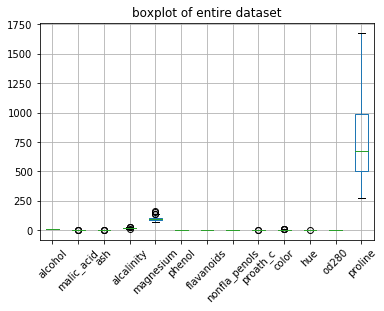

In [5]:
df.drop(['label'],axis=1).boxplot(rot=45)
plt.title('boxplot of entire dataset')
plt.show()

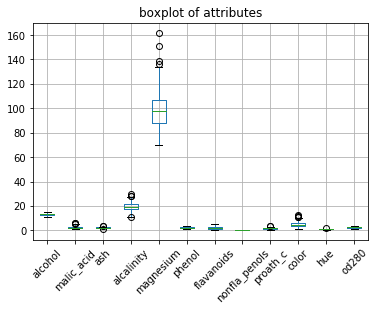

In [6]:
# check outliers
df_ = df.drop(['label','proline'],axis=1)
df_.boxplot(rot=45)
plt.title('boxplot of attributes')
# plt.set_xticklabels(aax.get_xticklabels(), rotation=40, ha="right")
plt.show()

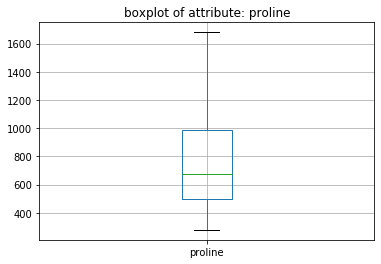

In [7]:
df_ = df['proline'].to_frame()
df_.boxplot()
plt.title('boxplot of attribute: proline')
plt.show()

In [30]:
cnames = ['mean', 'median', 'mode', 'trimmed mean (p=20%)', 'min', 'max', 'range', 'std']
df.drop(['label'],axis=1).agg(lambda x: pd.Series([np.mean(x), np.median(x),x.mode()[0], trim_mean(x, 0.2),x.min(),x.max(),x.max()-x.min(),x.std()], index=cnames))

,alcohol,malic_acid,ash,alcalinity,magnesium,phenol,flavanoids,nonfla_penols,proath_c,color,hue,od280,proline
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
median,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
mode,12.370000,1.730000,2.280000,20.000000,88.000000,2.200000,2.650000,0.260000,1.350000,2.600000,1.040000,2.870000,520.000000
trimmed mean (p=20%),13.008981,2.094444,2.371667,19.381481,97.851852,2.291389,2.058148,0.348704,1.565463,4.706852,0.964778,2.669537,696.611111
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000
range,3.800000,5.060000,1.870000,19.400000,92.000000,2.900000,4.740000,0.530000,3.170000,11.720000,1.230000,2.730000,1402.000000
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474


As we can see from the plots, outliers exits in the following attributes: Malic acid (malic_acid), ash, (Alcalinity of ash) alcalinity, 
Proanthocyanins(proath_c), color intensity (color), hue.
The following section select the outliers based on these attributes with interquantile range

In [8]:
# select the suspicious columns
suspicious_attributes = df[['malic_acid', 'ash','alcalinity', 'proath_c','color','hue']]
Q1 = suspicious_attributes.quantile(0.25)
Q3 = suspicious_attributes.quantile(0.75)
iqr = Q3 - Q1
lower_bound = Q1-1.5*iqr
upper_bound = Q3+1.5*iqr
#outliers = adult_numrics[((adult_numrics<lower_bound) | (adult_numrics>upper_bound)).any(axis=1)]
outliers = suspicious_attributes[((suspicious_attributes<lower_bound)|(suspicious_attributes>upper_bound)).any(axis=1)]
print(outliers)
inliner_df = df.drop(outliers.index)
print(len(inliner_df.index))
# we will simply keep the outliers

     malic_acid   ash  alcalinity  proath_c  color   hue
25         2.05  3.22        25.0      1.92   3.58  1.13
59         0.94  1.36        10.6      0.42   1.95  1.05
73         1.67  2.60        30.0      1.96   3.35  1.31
95         1.52  2.20        19.0      3.28   2.60  1.16
110        3.74  1.82        19.5      3.58   2.90  0.75
115        1.51  2.20        21.5      2.01   1.90  1.71
121        2.05  3.23        28.5      1.87   6.00  0.93
123        5.80  2.13        21.5      2.01   2.60  0.73
127        2.13  2.78        28.5      1.76   3.00  0.97
137        5.51  2.64        25.0      1.10   5.00  0.82
151        2.67  2.48        22.0      1.26  10.80  0.48
158        1.68  2.70        25.0      2.70  13.00  0.57
159        1.67  2.64        22.5      2.29  11.75  0.57
166        3.70  2.60        23.0      1.46  10.68  0.85
173        5.65  2.45        20.5      1.06   7.70  0.64
163


[Text(0.5, 0, 'alcohol'),
 Text(1.5, 0, 'malic_acid'),
 Text(2.5, 0, 'ash'),
 Text(3.5, 0, 'alcalinity'),
 Text(4.5, 0, 'magnesium'),
 Text(5.5, 0, 'phenol'),
 Text(6.5, 0, 'flavanoids'),
 Text(7.5, 0, 'nonfla_penols'),
 Text(8.5, 0, 'proath_c'),
 Text(9.5, 0, 'color'),
 Text(10.5, 0, 'hue'),
 Text(11.5, 0, 'od280'),
 Text(12.5, 0, 'proline')]

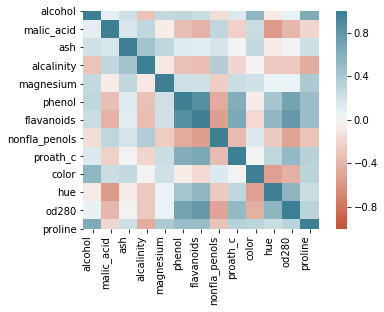

In [9]:
#find attribute dependency
#TODO
df_ = df.drop(['label'], axis=1)
corr = df_.corr()
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20,220,n=200),square=True)
ax.set_xticklabels(ax.get_xticklabels(), horizontalalignment='right')

# 2. Data Preprocessing

We have observed that Total Phenols and Flavanoids are highly correlated attributes, we will simply drop flavaniods 
attribute. We will not create any new attribute due to lack of domain knowledge. 

As we can see from the box plot, attribute Proline distributed in a significant larger area compared to other attribute.
Attribute Magnesium also have a larger value compared to the rest of the values.  
The scaling technique we will apply here is to first apply a logarithmic operation with base ten to attribute Proline 
and then to apply a minmax rescaling (linear rescaling) to all fo the attribute to set them into the section of 0~1.

We will first apply log rescaling to the Proline attribute a train test split, and do the linear rescaling on the 
training set; then the same rescaling techniques are applied to the testing set with the parameters obtained form 
training set. The reason of doing so is that log rescaling here is not parametric operation (only a 'hyperparameter' base
selected before applying, but min max rescaling require the knowlege of min and max value of each attribute, so the 
strategy described above can make sure the knowledge of minmum value and maximum value of each attribute in training set
is not implicitly passed to the model)  

In [10]:
df_selected = df.drop(['flavanoids'],axis=1)
# labels = pd.get_dummies(df_selected['label'],prefix='label')
df_selected['proline'] = np.log(df_selected['proline'])

X_train, X_test, y_train, y_test = model_selection.train_test_split(df_selected.drop(['label'],inplace=False, axis=1), 
                                                                    df_selected['label'], test_size=0.5)
wine_columns_ = wine_columns[:]
wine_columns_.remove('flavanoids')
wine_columns_.remove('label')
scaler = preprocessing.MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

x_train_df = pd.DataFrame(X_train, columns=wine_columns_)
x_test_df = pd.DataFrame(X_test, columns=wine_columns_)

y_train_one_hot = pd.get_dummies(y_train, prefix='label')
y_test_one_hot = pd.get_dummies(y_test, prefix='label')

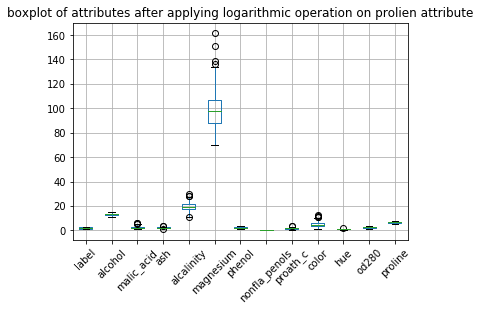

In [31]:
df_selected.boxplot(rot=45)
plt.title('boxplot of attributes after applying logarithmic operation on prolien attribute')
plt.show()

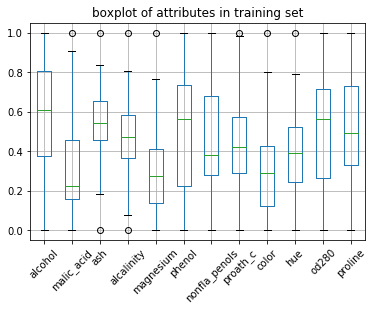

In [11]:
x_train_df.boxplot(rot=45)
plt.title('boxplot of attributes in training set')
plt.show()

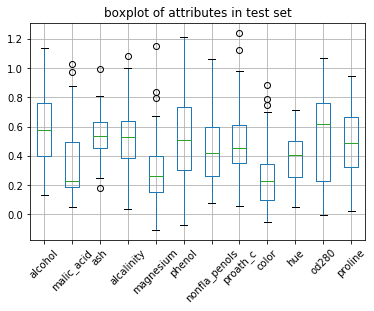

In [12]:
x_test_df.boxplot(rot=45)
plt.title('boxplot of attributes in test set')
plt.show()

# 3. build and evaluate clssifiers

In [13]:
classifier_name = ['Logistic Regression', 'KNN classifier', 'Decision Tree', 'Navie bayes', 'Linear SVM classifier',
                   'Random Forest']
logistic_regressor = linear_model.LogisticRegression()
knn = neighbors.KNeighborsClassifier()
decision_tree = tree.DecisionTreeClassifier()
nb = naive_bayes.GaussianNB()
linearSVM = svm.LinearSVC()
random_forest = ensemble.RandomForestClassifier()
all_classifiers = [logistic_regressor, knn, decision_tree, nb, linearSVM, random_forest]
dummies_classifiers = []
dummies_classifiers.append(knn)
dummies_classifiers.append(decision_tree)
dummies_classifiers.append(random_forest)
one_dim_classifier = []
one_dim_classifier.append(logistic_regressor)
one_dim_classifier.append(nb)
one_dim_classifier.append(linearSVM)

In [14]:
def fit_eval(classifier, attribute_train, label_train, attribute_test, label_test):
    
    classifier.fit(attribute_train, label_train)
    prediction = classifier.predict(attribute_test)
    accuracy = classifier.score(attribute_test, label_test)
    report = skmetrics.classification_report(label_test, prediction, output_dict=True)
    multilabel_confusion_matrix = skmetrics.multilabel_confusion_matrix(label_test, prediction)
    jaccard = skmetrics.jaccard_score(label_test, prediction, average='micro')
    prediction_train = classifier.predict(attribute_train)
    acc_train = classifier.score(attribute_train,label_train)
    report_train = skmetrics.classification_report(label_train,prediction_train, output_dict=True)
    jaccard_train = skmetrics.jaccard_score(label_train,prediction_train,average='micro')
    result_train = {'report':report_train, 'confusion_matrix':multilabel_confusion_matrix, 'jaccard': jaccard_train,'accuracy':acc_train}
    result_test = {'report':report, 'confusion_matrix':multilabel_confusion_matrix, 'jaccard': jaccard,'accuracy':accuracy}
    return (result_train,result_test)

In [15]:
result = {}
result_train = {}
for i in range(6):
    cls = all_classifiers[i]
    if cls in dummies_classifiers:
        eval_train, eval_score = fit_eval(cls, X_train, y_train_one_hot, X_test,y_test_one_hot)
        result_train[classifier_name[i]] = eval_train
        result[classifier_name[i]] = eval_score
    elif cls in one_dim_classifier:
        eval_train, eval_score = fit_eval(cls, X_train, y_train, X_test,y_test)
        result_train[classifier_name[i]] = eval_train
        result[classifier_name[i]] = eval_score
    # print(classifier_name[i])
    # print(result[classifier_name[i]])

C:\Users\rolo_\5243ExploratoryDataAnalysis\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rolo_\5243ExploratoryDataAnalysis\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\rolo_\5243ExploratoryDataAnalysis\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)
C:\Users\rolo_\5243ExploratoryDataAnalysis\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', 

In [16]:
print(result)

{'Logistic Regression': {'report': {'1': {'precision': 0.9, 'recall': 0.9642857142857143, 'f1-score': 0.9310344827586207, 'support': 28}, '2': {'precision': 0.9722222222222222, 'recall': 0.9210526315789473, 'f1-score': 0.9459459459459458, 'support': 38}, '3': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 23}, 'accuracy': 0.9550561797752809, 'macro avg': {'precision': 0.9574074074074074, 'recall': 0.961779448621554, 'f1-score': 0.9589934762348555, 'support': 89}, 'weighted avg': {'precision': 0.9566791510611735, 'recall': 0.9550561797752809, 'f1-score': 0.9552237243054755, 'support': 89}}, 'confusion_matrix': array([[[58,  3],
        [ 1, 27]],

       [[50,  1],
        [ 3, 35]],

       [[66,  0],
        [ 0, 23]]], dtype=int64), 'jaccard': 0.9139784946236559, 'accuracy': 0.9550561797752809}, 'KNN classifier': {'report': {'0': {'precision': 0.8484848484848485, 'recall': 1.0, 'f1-score': 0.9180327868852458, 'support': 28}, '1': {'precision': 1.0, 'recall': 0.81578947

In [25]:
def parse_and_plot_result(result,title):
    parsed_result = []
    accs = []
    jaccards = []
    f1s = []
    names = []
    for name in result.keys():
        print(name)
        print(result[name]['accuracy'])
        print(result[name]['jaccard'])
        print(result[name]['report']['weighted avg']['f1-score'])
        parsed_result.append([name, 
                              result[name]['accuracy'],
                              result[name]['jaccard'],
                              result[name]['report']['macro avg']['f1-score']])
        names.append(name)
        accs.append(result[name]['accuracy'])
        jaccards.append(result[name]['jaccard'])
        f1s.append(result[name]['report']['weighted avg']['f1-score'])
    
    parsed_result = pd.DataFrame(parsed_result, columns=['name', 'acc','jaccard', 'f1'])
    barwidth = 0.25
    r1 = np.arange(len(accs))
    r2 = [x + barwidth for x in r1]
    r3 = [x + barwidth for x in r2]
    plt.bar(r1,accs, color='#734338', width=barwidth, edgecolor='white', label='acc')
    plt.bar(r2, jaccards, color='#1b813E', width=barwidth, edgecolor='white', label='jaccard score')
    plt.bar(r3, f1s, color='#9b90c2',width=barwidth, edgecolor='white', label='f1 score')
    plt.xlabel('classifiers')
    fontP=FontProperties()
    fontP.set_size('small')
    plt.xticks([r+barwidth for r in range(len(classifier_name))],names,  rotation=20)
    plt.legend(prop=fontP, bbox_to_anchor=(1.2,1.2))
    plt.title(title)
    plt.show()

Logistic Regression
0.9550561797752809
0.9139784946236559
0.9543896548359215
KNN classifier
0.9438202247191011
0.9032258064516129
0.9485202320628626
Decision Tree
1.0
1.0
1.0
Navie bayes
0.9887640449438202
0.9777777777777777
0.9887877709424304
Linear SVM classifier
0.9887640449438202
0.9777777777777777
0.9887877709424304
Random Forest
0.9887640449438202
0.9887640449438202
0.994295592048401


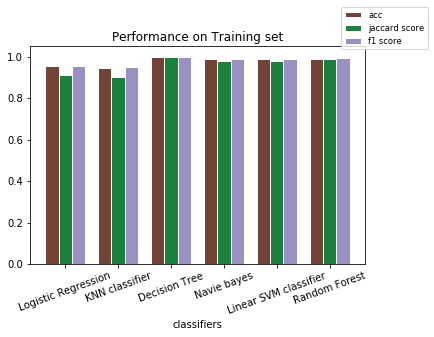

In [18]:
parse_and_plot_result(result_train, "Performance on Training set")

#4. Evaluation on test set
logistic regression, navie basyes and linear svm classifier suffers least lost on test set.
Tree based classifiers signinificantly suffers from overfitting problem, building ensembles might allevate the problem, 
but still suffers more than all other classifiers

Logistic Regression
0.9550561797752809
0.9139784946236559
0.9552237243054755
KNN classifier
0.9213483146067416
0.8631578947368421
0.9253986951336081
Decision Tree
0.8764044943820225
0.78
0.875773241919545
Navie bayes
0.9887640449438202
0.9777777777777777
0.9887348606449728
Linear SVM classifier
0.9887640449438202
0.9777777777777777
0.9887348606449728
Random Forest
0.9101123595505618
0.9
0.9472326258843111


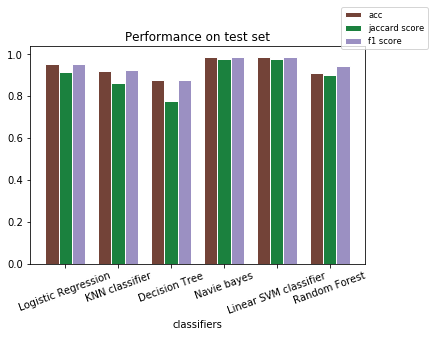

In [20]:
parse_and_plot_result(result,"Performance on test set")

#5. Improving model
Automatic Hyperparameter Tuning 

In [19]:
cls = ensemble.RandomForestClassifier()
parameters={'n_estimators':range(1,500,40),
            'criterion':['gini','entropy'],
            'max_depth':range(1,10,3),
            'max_features':['auto','log2']}
clf = model_selection.GridSearchCV(cls,parameters,cv=10)
clf.fit(X_train, y_train_one_hot)

C:\Users\rolo_\5243ExploratoryDataAnalysis\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             ii

In [21]:
print(clf.best_params_)

{'criterion': 'entropy', 'max_depth': 4, 'max_features': 'log2', 'n_estimators': 481}


In [22]:
# I would assume the training performance of fine-tuned model would be worse than the default parameter
best = clf.best_estimator_
prediction_train = best.predict(X_train)
acc_train = best.score(X_train,y_train_one_hot)
report_train = skmetrics.classification_report(y_train_one_hot, prediction_train, output_dict=True)
jaccard_train = skmetrics.jaccard_score(y_train_one_hot, prediction_train, average='micro')
best_train_result = {'report':report_train, 'jaccard': jaccard_train, 'accuracy':acc_train}

prediction_test = best.predict(X_test)
acc_test = best.score(X_test, y_test_one_hot)
report_test = skmetrics.classification_report(y_test_one_hot, prediction_test, output_dict=True)
jaccard_test = skmetrics.jaccard_score(y_test_one_hot, prediction_test, average='micro')
best_test_result = {'report':report_test,'jaccard':jaccard_test, 'accuracy':acc_test}

C:\Users\rolo_\5243ExploratoryDataAnalysis\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


In [23]:
result_test_ = {}
result_train_ = {}
result_test_['Default Random Forest'] = result['Random Forest']
result_train_['Default Random Forest'] = result_train['Random Forest']
result_test_['Tuned Random Forest'] = best_test_result
result_train_['Tuned Random Forest'] = best_train_result

Default Random Forest
0.9887640449438202
0.9887640449438202
0.994295592048401
Tuned Random Forest
1.0
1.0
1.0


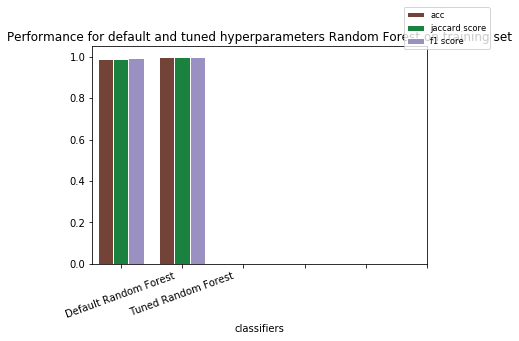

In [26]:
parse_and_plot_result(result_train_,'Performance for default and tuned hyperparameters Random Forest on training set')

Default Random Forest
0.9101123595505618
0.9
0.9472326258843111
Tuned Random Forest
0.9775280898876404
0.9666666666666667
0.9829409539640174


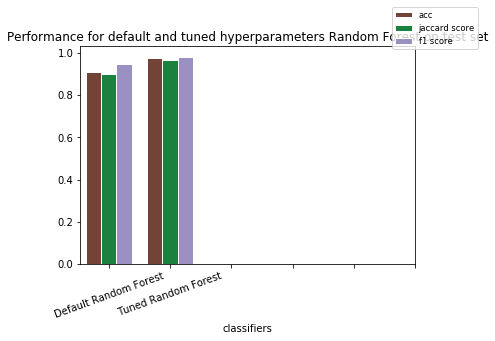

In [27]:
parse_and_plot_result(result_test_,'Performance for default and tuned hyperparameters Random Forest on test set')

# Reference
[1] http://www.wineeducation.com/wineismadeof.html  
[2] https://www.institut-heidger.de/en/asche-summe-aller-mineralstoffe/  
[3] https://www.verywellhealth.com/red-wine-and-longevity-2224017  
[4] https://www.chron.com/news/health/article/The-skinny-on-red-wine-and-magnesium-1806764.php  